In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
import os,os.path
import gensim,re 

In [12]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            if fname.endswith('.txt'):
                logging.info(f"Processing {fname}")
                with open(os.path.join(self.dirname, fname), 'r', encoding='utf-8') as fin:
                    for line in fin:
                        # Clean & tokenize the line
                        line = re.sub("[^a-zA-Z]", " ", line)
                        yield line.lower().split()


In [13]:
sentences = MySentences('d:/pre_course/Pratice/ResumeMatchingMVP/stackexchange')

In [14]:
for s in sentences:
    print(s)
    break  # just show one example


2025-04-07 00:03:15,189 : INFO : Processing sample_bitcoin.stackexchange_paras.txt


['p', 'what', 'open', 'source', 'miner', 'applications', 'are', 'there', 'especially', 'to', 'see', 'how', 'the', 'mining', 'process', 'works', 'p']


In [15]:
from collections import defaultdict
d = defaultdict(lambda : 0)
for each in sentences:
    d[len(each)] += 1

2025-04-07 00:04:23,060 : INFO : Processing sample_bitcoin.stackexchange_paras.txt
2025-04-07 00:04:26,385 : INFO : Processing sample_bitcoin.stackexchange_sentences.txt


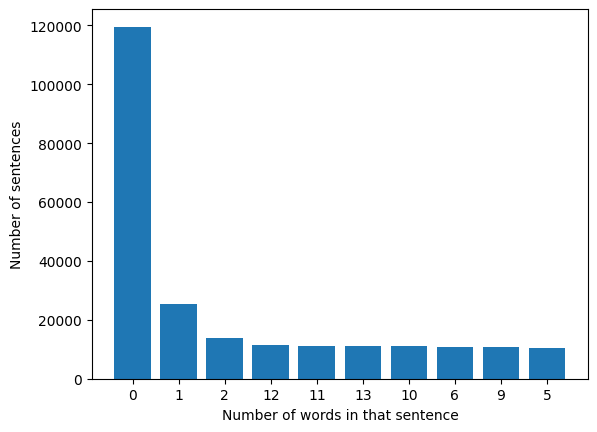

In [16]:

#Identifying proper context parameter for word2vec model training.
import operator
d = dict(sorted(d.items(), key=operator.itemgetter(1), reverse=True)[:10])

import matplotlib.pyplot as plt

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys())
plt.ylabel("Number of sentences")
plt.xlabel("Number of words in that sentence")
plt.savefig('context.jpg')
plt.show()

In [18]:
# Set values for various parameters
#size = 300             # Word vector dimensionality                      
#min_count = 10         # Minimum word count                        
#workers = 4            # Number of threads to run in parallel
#window = 15           # Context window size                                                                                    
#sample = 1e-3          # Downsample setting for frequent words


model = gensim.models.Word2Vec(sentences, vector_size=300, workers=4, min_count=1, window=15, sample=1e-3)

2025-04-07 00:18:10,708 : INFO : collecting all words and their counts
2025-04-07 00:18:10,710 : INFO : Processing sample_bitcoin.stackexchange_paras.txt
2025-04-07 00:18:11,066 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-04-07 00:18:11,193 : INFO : PROGRESS: at sentence #10000, processed 179389 words, keeping 8509 word types
2025-04-07 00:18:11,308 : INFO : PROGRESS: at sentence #20000, processed 339481 words, keeping 11860 word types
2025-04-07 00:18:11,423 : INFO : PROGRESS: at sentence #30000, processed 490560 words, keeping 14346 word types
2025-04-07 00:18:11,546 : INFO : PROGRESS: at sentence #40000, processed 640523 words, keeping 16288 word types
2025-04-07 00:18:11,675 : INFO : PROGRESS: at sentence #50000, processed 771474 words, keeping 17889 word types
2025-04-07 00:18:11,948 : INFO : PROGRESS: at sentence #60000, processed 910716 words, keeping 19380 word types
2025-04-07 00:18:12,141 : INFO : PROGRESS: at sentence #70000, processed 105

In [19]:
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "stackexchange_model"
model.save(model_name)

2025-04-07 00:20:25,586 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'stackexchange_model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2025-04-07T00:20:25.586702', 'gensim': '4.3.3', 'python': '3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'saving'}
2025-04-07 00:20:25,589 : INFO : storing np array 'vectors' to stackexchange_model.wv.vectors.npy
2025-04-07 00:20:26,509 : INFO : storing np array 'syn1neg' to stackexchange_model.syn1neg.npy
2025-04-07 00:20:26,905 : INFO : not storing attribute cum_table
2025-04-07 00:20:26,942 : INFO : saved stackexchange_model


In [21]:
print(len(model.wv.key_to_index))

48748


In [23]:
#Odd one out.
print (model.wv.doesnt_match("java html javascript".split()))
print (model.wv.doesnt_match("java python html javascript".split()))
print (model.wv.doesnt_match("server linux windows redhat".split()))
print (model.wv.doesnt_match("cool hot big".split()))
print (model.wv.doesnt_match("internship job training".split()))

2025-04-07 00:24:16,148 : WARNING : vectors for words {'internship'} are not present in the model, ignoring these words


html
html
redhat
hot
job


In [25]:
#man is to women as king is to ______
print (model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))
#css is to html as java is to _______
print (model.wv.most_similar(positive=['java', 'html'], negative=['css'], topn=1))
#berlin is to germany as paris is to _________
print (model.wv.most_similar(positive=['paris', 'germany'], negative=['berlin'], topn=1))
#he is to his as she is to _______
print (model.wv.most_similar(positive=['she', 'his'], negative=['he'], topn=1))
#windows is to microsoft as osx is to __________
print (model.wv.most_similar(positive=['osx', 'microsoft'], negative=['windows'], topn=1))

[('csemaphoregrant', 0.7301995158195496)]
[('xchange', 0.5117818713188171)]
[('bills', 0.40326544642448425)]
[('her', 0.8109297156333923)]
[('pbfgminer', 0.6190739870071411)]


In [27]:
print(model.wv.similarity('wallet','android'))
print(model.wv.similarity('wallet','purse'))
print(model.wv.similarity('windows','microsoft'))
print(model.wv.similarity('cyanogenmod','android'))

0.35525143
0.23671718
0.3405772


KeyError: "Key 'cyanogenmod' not present"

In [28]:
model = gensim.models.Word2Vec.load('stackexchange_model')
#model.train(more_sentences)

2025-04-07 00:31:51,526 : INFO : loading Word2Vec object from stackexchange_model
2025-04-07 00:31:51,551 : INFO : loading wv recursively from stackexchange_model.wv.* with mmap=None
2025-04-07 00:31:51,553 : INFO : loading vectors from stackexchange_model.wv.vectors.npy with mmap=None
2025-04-07 00:31:51,583 : INFO : loading syn1neg from stackexchange_model.syn1neg.npy with mmap=None
2025-04-07 00:31:51,613 : INFO : setting ignored attribute cum_table to None
2025-04-07 00:31:52,005 : INFO : Word2Vec lifecycle event {'fname': 'stackexchange_model', 'datetime': '2025-04-07T00:31:52.005370', 'gensim': '4.3.3', 'python': '3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'loaded'}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assume your data has columns: 'job_description', 'resume_text', 'label'
df = pd.read_csv('evaluation_dataset.csv')

true_labels = []
predicted_labels = []

for _, row in df.iterrows():
    jd = row['job_description']
    resume = row['resume_text']
    true_label = row['label']

    # Preprocess
    jd_processed = preprocess_text(jd)
    resume_processed = preprocess_text(resume)

    # Use your trained model to calculate similarity
    similarity_score = calculate_similarity_with_model(jd_processed, resume_processed)

    # Classify: 1 if similarity > 0.5 else 0
    predicted = 1 if similarity_score > 0.5 else 0

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Evaluate
print("Accuracy:", accuracy_score(true_labels, predicted_labels))
print(classification_report(true_labels, predicted_labels))
